# DICOM 파일 이미지 변환

- 파일의 경로설정만 잘해주면 됩니다
    - 해당 파일에 DICOM 파일을 전부 넣어주면 됩니다.

In [107]:
from glob import glob
import os
import numpy as np
import pydicom
#import skimage.external.tifffile 
import matplotlib.pyplot as plt
#import imsave
from PIL import Image

In [114]:
# 사진 경로 설정
dicom_dir = 'C:\\Users\\default.DESKTOP-2ISHQBS\\lab\\task3_dcm\\dcm'
dcm_files = glob(os.path.join(dicom_dir, '*.dcm'))
#dcm_files = [pydicom.dcmread(s) for s in dcm_files]
#dcm_files.sort(key = lambda x : int(x.InstanceNumber))
#dsRef = dcm_files[0]

In [85]:
# dcm list
dcm_lst = [pydicom.dcmread(dcm_files[i]) for i in range(len(dcm_files ))]

In [89]:
# img list
img_lst = [dcm_lst[i].pixel_array for i in range(len(dcm_lst))]

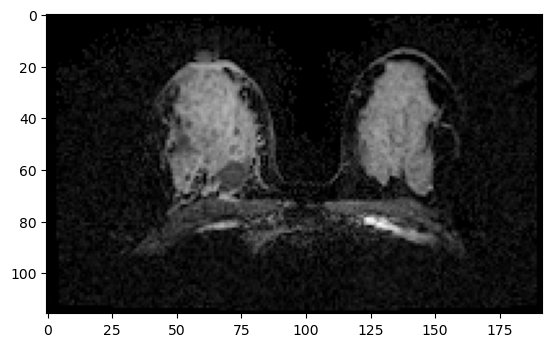

In [94]:
plt.imshow(img_lst[0], cmap = 'gray')

## dicom 파일 -> 이미지 추출 저장

In [117]:

# Windowing 함수
def apply_windowing(image, window_center, window_width):
    """
    Windowing을 적용하여 픽셀 값을 조정합니다.
    """
    image = image.astype(np.float32)
    lower_bound = window_center - window_width / 2
    upper_bound = window_center + window_width / 2
    
    image = (image - lower_bound) / (upper_bound - lower_bound) * 255
    image = np.clip(image, 0, 255)
    
    return image.astype(np.uint8)

# 각 DICOM 파일에 대해 반복
for i, file_path in enumerate(dcm_files):
    # DICOM 파일 읽기
    ds = pydicom.dcmread(file_path)

    # DICOM 이미지 가져오기
    image = ds.pixel_array

    if hasattr(ds, 'WindowCenter') and hasattr(ds, 'WindowWidth'):
        # Windowing을 적용
        window_center = ds.WindowCenter if isinstance(ds.WindowCenter, float) else ds.WindowCenter[0]
        window_width = ds.WindowWidth if isinstance(ds.WindowWidth, float) else ds.WindowWidth[0]
        image = apply_windowing(image, window_center, window_width)

    pil_image = Image.fromarray(image)

    # 이미지 저장 (파일 경로 지정)
    output_file_path = f'tiff/output_image_{i}.tif'  # png or tif
    pil_image.save(output_file_path)

    print(f"이미지가 저장되었습니다: {output_file_path}")


이미지가 저장되었습니다: tiff/output_image_0.tif
이미지가 저장되었습니다: tiff/output_image_1.tif
이미지가 저장되었습니다: tiff/output_image_2.tif
이미지가 저장되었습니다: tiff/output_image_3.tif
이미지가 저장되었습니다: tiff/output_image_4.tif
이미지가 저장되었습니다: tiff/output_image_5.tif
